In [51]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [52]:
run = 2

In [53]:
inf = open("SLANT_logs/run%d.mem" %(run), "r")
#inf = open("SLANT_logs/slant.mem.log", "r")
mem_footprint = []
for line in inf:
    line = line.split('\n')[0]
    if line == "":
        continue
    mem = float(line.strip('MGB'))
    # transform memory into GB
    if 'M' in line:
        mem /= 1024
    mem_footprint.append(mem)

len(mem_footprint)

3985

In [54]:
inf = open("SLANT_logs/run%d_inria.mem" %(run), "r")
#inf = open("SLANT_logs/slant.mem.log", "r")
inria_footprint = []
for line in inf:
    line = line.split('\n')[0].split(",")
    if len(line) != 2:
        continue
    mem = (int(line[0]), int(line[1])/(1024*1024))
    inria_footprint.append(mem)

len(inria_footprint)

3707

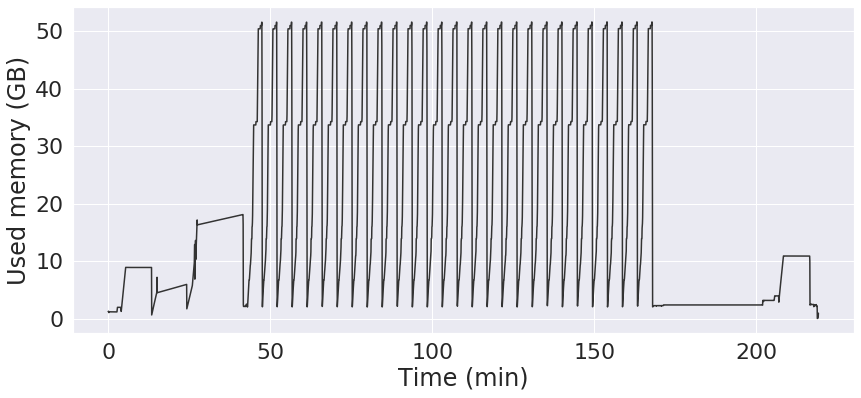

In [55]:
# Plot VU performance
fig, ax = plt.subplots(figsize=(14,6))
sns.set(font_scale=2)

plt.plot([3.3*i/60 for i in range(len(mem_footprint))], mem_footprint, color="#333333")

ax.set_ylabel('Used memory (GB)')
ax.set_xlabel('Time (min)')
plt.savefig("SLANT_logs/memusage_%d.png" %(run))
plt.show()

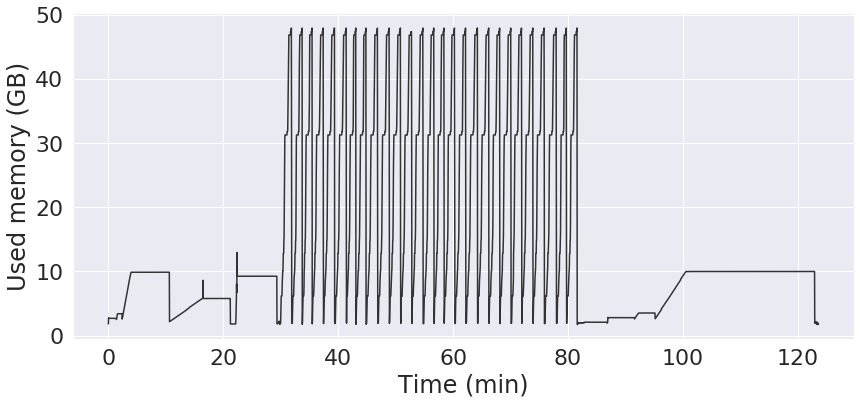

In [56]:
# Plot Inria performance
fig, ax = plt.subplots(figsize=(14,6))
sns.set(font_scale=2)

plt.plot([i[0]/60 for i in inria_footprint], [i[1] for i in inria_footprint], color="#333333")

ax.set_ylabel('Used memory (GB)')
ax.set_xlabel('Time (min)')
plt.savefig("SLANT_logs/memusage_%d_inria.png" %(run))
plt.show()